(60000, 784) (60000, 10)
(10000, 784) (10000,)
Epoch 1, training loss = 0.3353060640133419
Epoch 2, training loss = 0.23021802348502585
Epoch 3, training loss = 0.16942328303191956
Epoch 4, training loss = 0.13031158920981126
Epoch 5, training loss = 0.09975104036566071
Epoch 6, training loss = 0.09350772868493708
Epoch 7, training loss = 0.0918326322696079
Epoch 8, training loss = 0.09109509087573796
Epoch 9, training loss = 0.09069324310056492
Epoch 10, training loss = 0.09044710605509099


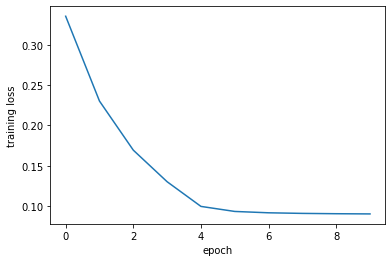

test accuracy:0.1705


In [1]:
from my_sequential import MyDenseLayer, MySequential
import tensorflow as tf
import numpy as np
from help_func import one_hot

# 加载训练集
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
np.random.seed(233)
np.random.shuffle(X_train)
np.random.seed(233)
np.random.shuffle(y_train)

X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, X_test = X_train.reshape(
    len(X_train), -1), X_test.reshape(len(X_test), -1)
y_train = one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# 创建单隐藏层神经网络
model = MySequential(
    [MyDenseLayer(in_features=784, out_features=100, activation='sigmoid', bias=True),
     MyDenseLayer(in_features=100, out_features=100,
                  activation='sigmoid', bias=False),
     MyDenseLayer(in_features=100, out_features=10, activation='sigmoid', bias=True)])

X_train, y_train = X_train[0:100, :], y_train[0:100]
# learning rate 学习率有甜点，这个数据集这个方法大概在0.1-0.3之间效果好
model.fit(X_train, y_train, epoch=10, batch_size=32,
          learning_rate=0.1, loss='mse')
print('test', end=" ")
model.evaluate(X_test, y_test)